# Use OSMnx to plot street network over place shape

This example uses Portland, Maine - a city with several islands within its municipal boundaries. Thus, we set `retain_all=True` when getting the network so that we keep all the graph components, not just the largest connected component.

In [1]:
import osmnx as ox, matplotlib.pyplot as plt
from descartes import PolygonPatch
from shapely.geometry import Polygon, MultiPolygon
ox.config(log_console=True, use_cache=True)

In [2]:
# get the place shape
gdf = ox.gdf_from_place('Portland, Maine')
gdf = ox.project_gdf(gdf)

# get the street network, with retain_all=True to retain all the disconnected islands' networks
G = ox.graph_from_place('Portland, Maine', network_type='drive', retain_all=True)
G = ox.project_graph(G)

In [3]:
# plot the network, but do not show it or close it yet
fig, ax = ox.plot_graph(G, fig_height=10, show=False, close=False, edge_color='#777777')

In [4]:
# to this matplotlib axis, add the place shape as descartes polygon patches
for geometry in gdf['geometry'].tolist():
    if isinstance(geometry, (Polygon, MultiPolygon)):
        if isinstance(geometry, Polygon):
            geometry = MultiPolygon([geometry])
        for polygon in geometry:
            patch = PolygonPatch(polygon, fc='#cccccc', ec='k', linewidth=3, alpha=0.1, zorder=-1)
            ax.add_patch(patch)

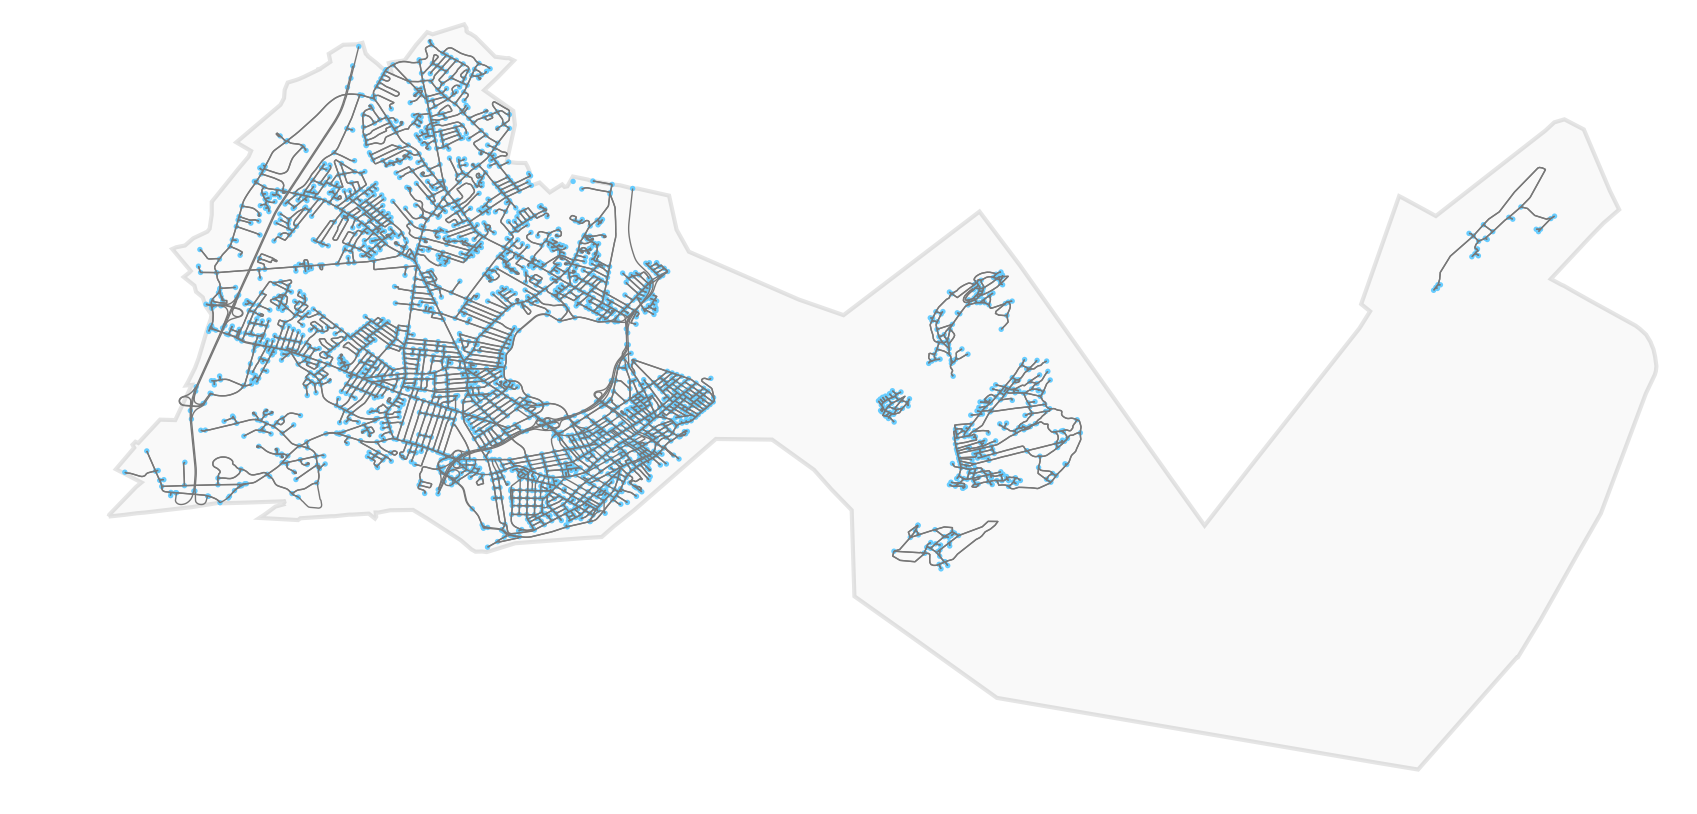

In [5]:
# optionally set up the axes extents all nicely
margin = 0.02
west, south, east, north = gdf.unary_union.bounds
margin_ns = (north - south) * margin
margin_ew = (east - west) * margin
ax.set_ylim((south - margin_ns, north + margin_ns))
ax.set_xlim((west - margin_ew, east + margin_ew))
plt.show()

Notice this municipal boundary is an administrative boundary, not a physical boundary, so it represents jurisdictional bounds, not individiual physical features like islands.